#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [648]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

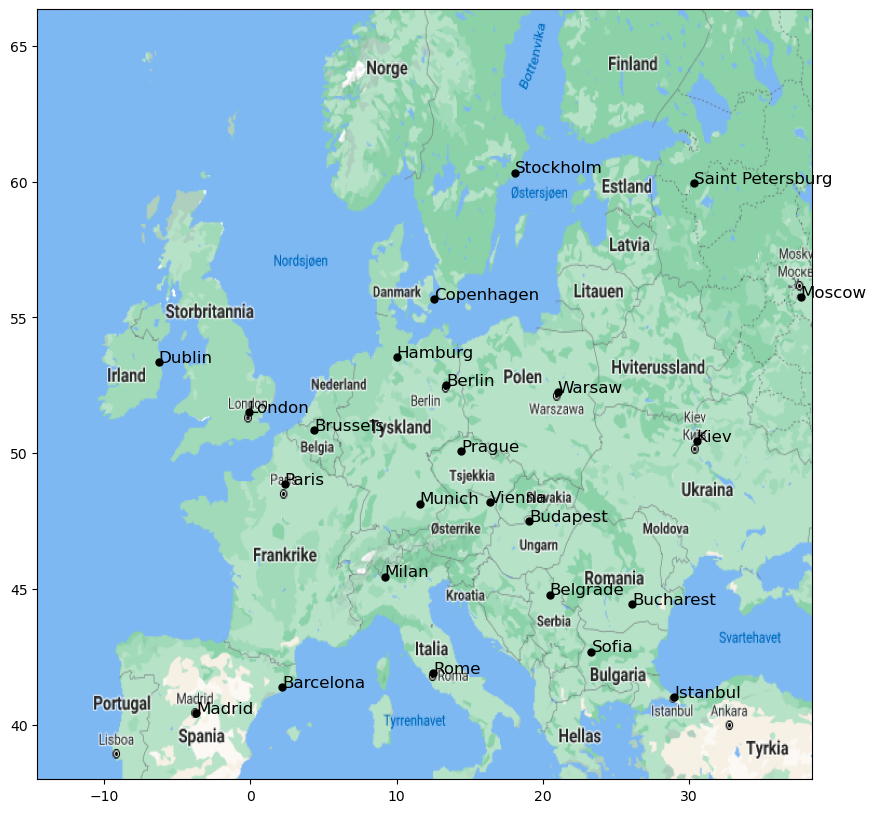

In [649]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [650]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Added to display correct names in plots
        name = list(city_coords.keys())[list(city_coords.values()).index(current_city_coords)]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, name, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    #Added to display correct names in plots
    last_name = list(city_coords.keys())[list(city_coords.values()).index(next_city_coords)]
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, last_name, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


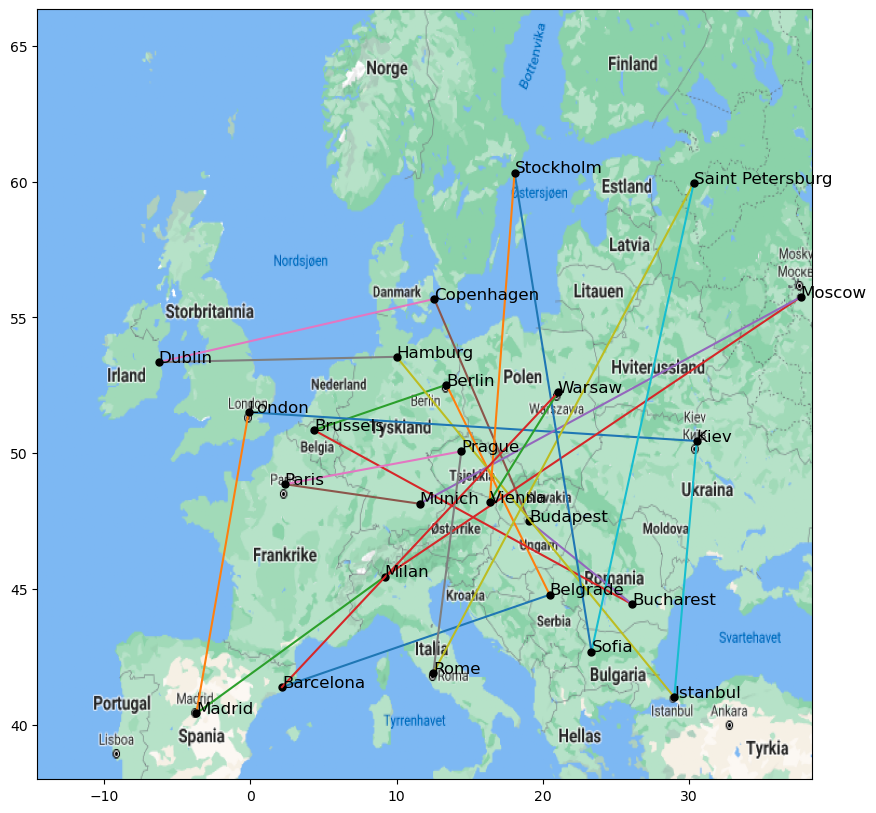

In [651]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [858]:
# Implement the algorithm here

import itertools as it

# find total lenght of list of cities (one possible tour)
def length(tour):
    total_length = 0
    for i in range(len(tour)):
        city = tour[i - 1]
        next_city = tour[i]
        dist = float(data[cities.index(city) + 1][cities.index(next_city)])
        total_length += dist
    return total_length

# function to find shortest total distance using exhaustive search
def exhaustive_search(subset_cities):
    # make list of all possible lengths
    list_of_all_distances = [length(i) for i in it.permutations(subset_cities)]
    # find shortest distance
    shortest_tour_dist = min(list_of_all_distances)
    # go back to get corresponding list of city names
    shortest_tour_index = list_of_all_distances.index(shortest_tour_dist)
    shortest_tour = list(it.permutations(subset_cities))[shortest_tour_index]
    
    return shortest_tour

Timing program for 6 to 10 cities:

In [894]:
import time

subset_cities_6 = cities[::4] 
subset_cities_7 = cities[1:20:3]
subset_cities_8 = cities[::3]
subset_cities_9 = cities[6::2]
subset_cities_10 = cities[4::2]

all_subsets = [subset_cities_6, subset_cities_7, subset_cities_8, subset_cities_9, subset_cities_10]


list_of_runtimes = []
for i in all_subsets:
# time exhaustive search
    start_t = time.time()
    shortest_tour = exhaustive_search(i)
    end_t = time.time()
    list_of_runtimes.append(end_t - start_t)
    print(f"Runtime for program with {all_subsets.index(i) + 6} cities: {end_t - start_t} seconds")


Runtime for program with 6 cities: 0.004807949066162109 seconds
Runtime for program with 7 cities: 0.04729127883911133 seconds
Runtime for program with 8 cities: 0.31459903717041016 seconds
Runtime for program with 9 cities: 2.7511138916015625 seconds
Runtime for program with 10 cities: 24.622907161712646 seconds


The runtime has a growth where each runtime is approximately 10 times larger than the last one. Finally plotting the shortest tour for 6 and 10 cities.

Shortest tour of the 6 cities ('Barcelona', 'Sofia', 'Bucharest', 'Hamburg', 'Paris', 'Madrid')


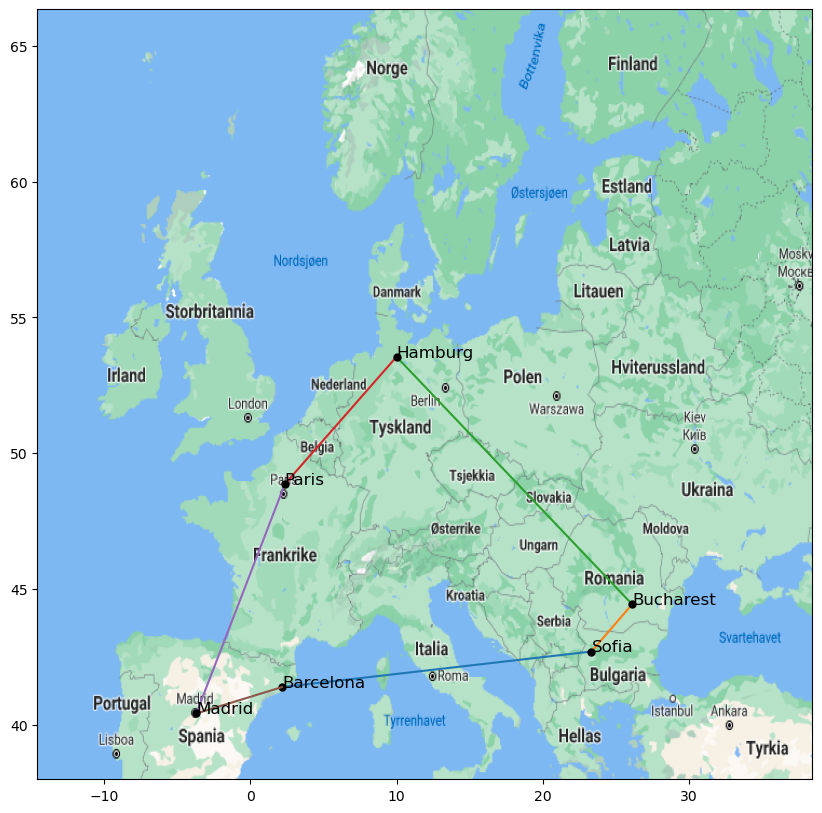

Shortest tour of the 10 cities ('Madrid', 'Paris', 'Hamburg', 'Copenhagen', 'Moscow', 'Kiev', 'Bucharest', 'Sofia', 'Vienna', 'Rome')


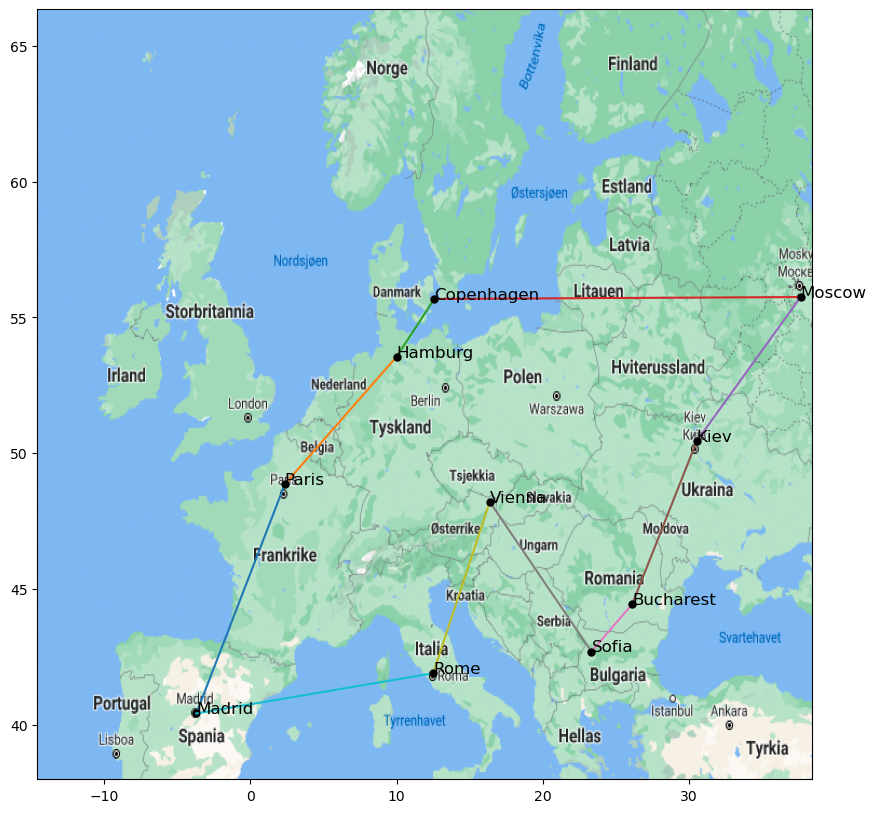

In [859]:
#Plotting shortest tours for 6 and 10 cities

shortest_tour_6_cities = exhaustive_search(subset_cities_6)
shortest_tour_10_cities = exhaustive_search(subset_cities_10)

print("Shortest tour of the 6 cities", shortest_tour_6_cities)
plot_plan(shortest_tour_6_cities)
print("Shortest tour of the 10 cities", shortest_tour_10_cities)
plot_plan(shortest_tour_10_cities)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [915]:
# approximation of how long it would take to perform an 
# exhaustive search on all 24 cities

approx_time = list_of_runtimes[-1]*(24 - 10)**10
print(f"Following the same trend the approximate runtime for an exhaustive search for 24 cities is around {approx_time/3.154e+10:.2f} thousand years")


Following the same trend the approximate runtime for an exhaustive search for 24 cities is around 225.82 thousand years


For the first 10 cities we can use the function exhaustive_search on a list containing these, and the length function on the result.

Runtime for program: 18.04618215560913 seconds
('Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen')
The tour has a total length of 7486.31 km


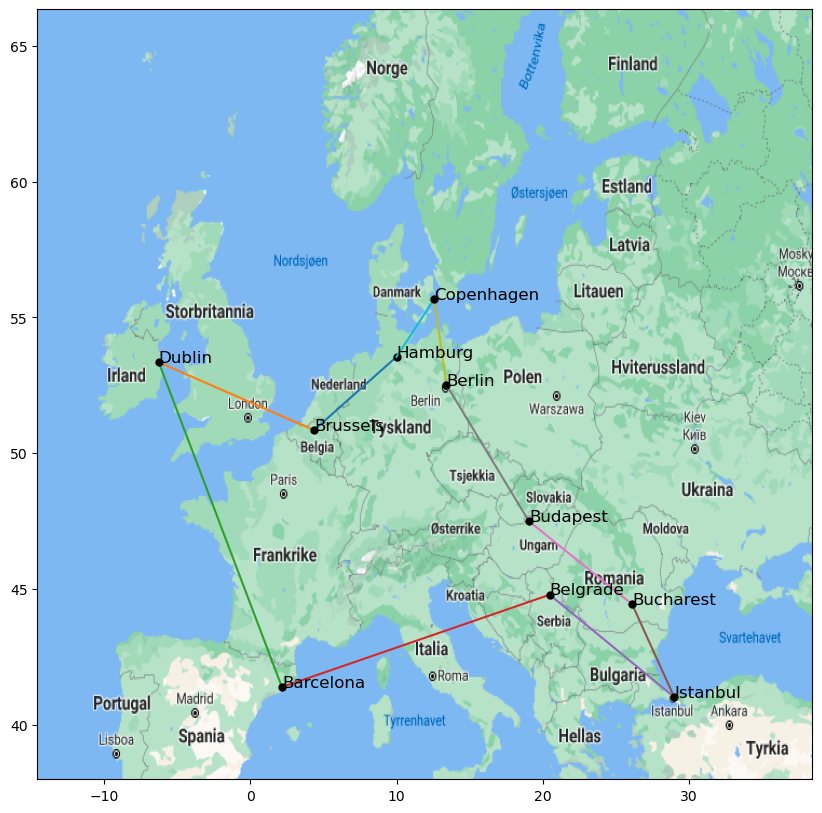

In [655]:
# Answer

# first 10 cities
first_10 = cities[:10]

# running and timing program
start_t = time.time()
shortest_tour_first_10 = exhaustive_search(first_10)
end_t = time.time()
print(f"Runtime for program: {end_t - start_t} seconds")

# Printing tour sequence and total lenght, and plotting plan
print(shortest_tour_first_10)
print(f"The tour has a total length of {length(shortest_tour_first_10):.2f} km")
plot_plan(shortest_tour_first_10)


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [656]:
# Implement the algorithm here

# using random generator from numpy library
rng = np.random.default_rng()


def hill_climbing(tour):
    # Create random solution
    rng.shuffle(tour)
    tour = list(tour)
    best_tour = tour
    best_length = length(tour)

    l = len(tour)

    tol = 50 
    i = 0

    # test to see if neighbour solution is better
    for _ in range(100000): # repeat for a decent number of evaluations
        i += 1
        # Swap mutation: swap two cities at random
        index_1 = np.random.randint(l) # first index to be swapped
        index_2 = np.random.randint(l) # second index
        if index_1 == index_2:
            # change index if they are equal
            if index_2 == l - 1:
                index_2 -= 1
            else:
                index_2 += 1
        tour[index_1], tour[index_2] = tour[index_2], tour[index_1]
        length_ = length(tour)
        if (i > 10000) and (np.abs(best_length - length_) < tol):
            # breaks loop and delivers result if 
            # little improvement is seen after 10 000 iterations
            break
        if length_ < best_length:
            best_tour = tour
            best_length = length_
        else:
            #swap back and continue loop
            tour[index_1], tour[index_2] = tour[index_2], tour[index_1]

            
    return best_tour, best_length

Comparing the exhaustive search vs. the hill climbing algorithms for the first 10 cities:

In [657]:
best_lengths_hc = []
best_tours_hc = []
times_hc = []

# finding an average of performance
for _ in range(20):
    st = time.time()
    best_t_hc, best_l_hc = hill_climbing(first_10)
    et = time.time()
    times_hc.append(et - st)
    best_lengths_hc.append(best_l_hc)
    best_tours_hc.append(best_t_hc)

ind_tour_hc = best_lengths_hc.index(np.min(best_lengths_hc))


best_tour_hc = best_tours_hc[ind_tour_hc]
best_length_hc = np.mean(best_lengths_hc)

start = time.time()
best_tour_es = exhaustive_search(first_10)
best_length_es = length(best_tour_es)
end = time.time()

print(f"The best tour of the first 10 cities using the exhaustive search algorithm is: {best_tour_es}, with a length of {best_length_es:.2f} km. The program's runtime was {end - start:.2f} s.\n")
print(f"The best tour of the first 10 cities found among 20 runs of the hill climbing algorithm is: {best_tour_hc}, with a mean lenght between all 20 runs of {best_length_hc:.2f} km. The program had an approximate runtime of {np.mean(times_hc):.2f} s.")

The best tour of the first 10 cities using the exhaustive search algorithm is: ('Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen'), with a length of 7486.31 km. The program's runtime was 18.01 s.

The best tour of the first 10 cities found among 20 runs of the hill climbing algorithm is: ['Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin'], with a mean lenght between all 20 runs of 7659.48 km. The program had an approximate runtime of 0.77 s.


The exhaustive search algorithm finds the best possible tour for the first 10 cities in around 16 - 17 seconds. 

The hill climber algorithm performs very well on runtime, with an approximate runtime of 0.5 - 1 second. The hill climber algorithm is very close to the best possible tour length with a devience of approximately 100 km. The test was done on 20 runs of the hill climbing algorithm to find mean values and the best tour among the 20 runs.

### Report Hill Climbing (10 first cities)

Length of the tour of the best, worst, mean and standard deviation of tour of 20 runs.

Length of tours found using hill climbing on the first 10 cities:
Best: 7486.31 km
Worst: 8349.94 km
Mean: 7659.48 km
Standard deviation: 302.47 km

The best tour of the 10 first cities:


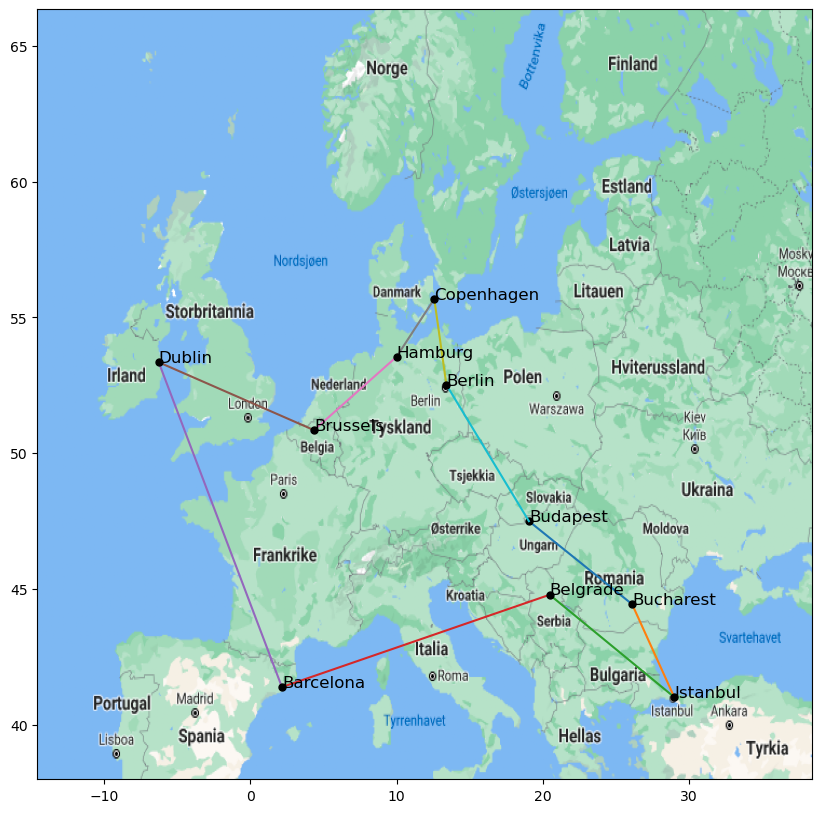

In [658]:
print("Length of tours found using hill climbing on the first 10 cities:")
print(f"Best: {np.min(best_lengths_hc):.2f} km")
print(f"Worst: {np.max(best_lengths_hc):.2f} km")
print(f"Mean: {np.mean(best_lengths_hc):.2f} km")
print(f"Standard deviation: {np.std(best_lengths_hc):.2f} km")

# plotting the best found tour

print("\nThe best tour of the 10 first cities:")
plot_plan(best_tour_hc)

### Report Hill Climbing (all cities)

Length of the tour of the best, worst, mean and standard deviation of tour of 20 runs.

In [659]:
all_cities = cities[:]

b_l_hc = []
b_t_hc = []

# finding an average of performance
for _ in range(20):
    best_t, best_l = hill_climbing(all_cities)
    b_l_hc.append(best_l)
    b_t_hc.append(best_t)

i_tour_hc = b_l_hc.index(np.min(b_l_hc))

b_tour_hc = b_t_hc[i_tour_hc]

print("Length of tours found using hill climbing:")
print(f"Best: {np.min(b_l_hc):.2f} km")
print(f"Worst: {np.max(b_l_hc):.2f} km")
print(f"Mean: {np.mean(b_l_hc):.2f} km")
print(f"Standard deviation: {np.std(b_l_hc):.2f} km")


Length of tours found using hill climbing:
Best: 12682.02 km
Worst: 15745.50 km
Mean: 14038.09 km
Standard deviation: 670.24 km



The best tour of all cities:
Tour: ['Stockholm', 'Copenhagen', 'Hamburg', 'Berlin', 'Warsaw', 'Munich', 'Milan', 'Rome', 'Barcelona', 'Madrid', 'Dublin', 'London', 'Paris', 'Brussels', 'Prague', 'Vienna', 'Budapest', 'Belgrade', 'Sofia', 'Istanbul', 'Bucharest', 'Kiev', 'Moscow', 'Saint Petersburg']
Total length : 12694.70 km.


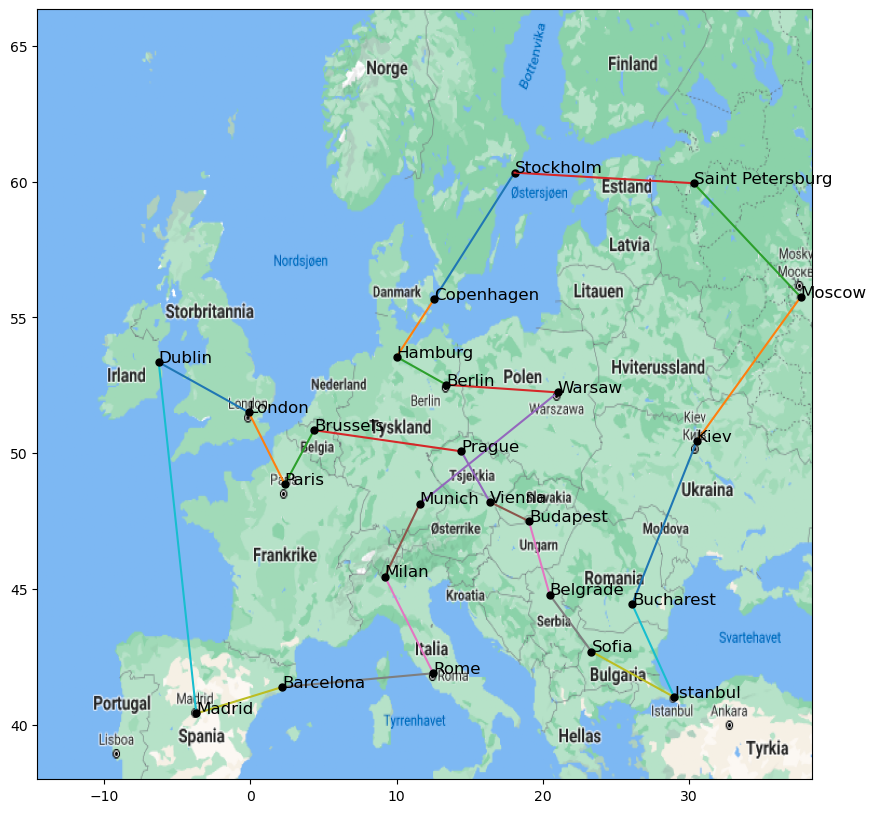

In [660]:
# plotting the best found tour

print("\nThe best tour of all cities:")
print(f"Tour: {b_tour_hc}\nTotal length : {length(b_tour_hc):.2f} km.")
plot_plan(b_tour_hc)

Even if we do not know what the global optimum is, we can see from the plot above that we have found a local optimum. The path between the cities get stuck in cycles/spirals, where swapping two cities will not provide a better solution. This is an example of how the hill climbing algorithm lacks exploration in this case, as only two cities out of 24 are swapped at a time. When using the hill climbing algorithm on only the first 10 cities, the global optimum is found in some runs. Even if only 2 cities are swapped, the level of exploration is higher in this case as the total number of cities are less, providing greater exploration within each iteration. 

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

Answer: Mutation functions and GA is implemented below.

In [855]:
# mutation functions

# partially mapped crossover function
def pmx_pair(p1, p2):
    # initializing offspring
    c1 = [0 for i in p1]
    c2 = [0 for i in p1]
    # two crossover points at random:
    rng = np.random.default_rng()
    ind_1 = rng.integers(len(p1))
    ind_2 = ind_1 + rng.integers(len(p1) - ind_1)
    cutout_indices = np.arange(ind_1, ind_2 + 1, dtype = int)
    for i in cutout_indices:
        c1[i] = p1[i]
        c2[i] = p2[i]


    def fill_pmx(c1, p1, p2):
        for i_elem, j_elem in zip(p2, p1):
            if i_elem not in c1 and c1[p2.index(i_elem)] != 0:
                j = p2.index(j_elem)
                if c1[j] == 0:
                    c1[j] = i_elem
                else:
                    k_elem = c1[j]
                    k = p2.index(k_elem)
                    if c1[k] == 0:
                        c1[k] = i_elem
                    else:
                        k = p2.index(c1[k])
                        if c1[k] == 0:
                            c1[k] = i_elem
        for i in range(len(p1)):
            if c1[i] == 0:
                c1[i] = p2[i]
        return c1

    c1 = fill_pmx(c1, p1, p2)
    c2 = fill_pmx(c2, p2, p1)

    return c1, c2

# Cycle crossover function:
def cycle_crossover_pair(p1, p2):
    # initializing offspring
    c1 = [0 for i in p1]
    c2 = [0 for i in p1]

    def fill_cycle(c1, p1, p2):
        cycle = []
        cycle_index = []
        j = 0
        V = p1[j]
        index = p2.index(V)
        cycle.append(V)
        cycle_index.append(index)
        for _ in range(len(p1)):
            j = p1.index(V)
            V = p2[j]
            index = p2.index(V)
            if V == p1[0]:
                break
            cycle.append(V)
            cycle_index.append(index)

        for i in cycle:
            c1[p1.index(i)] = i 

        return c1

    c1 = fill_cycle(c1, p1, p2)  
    c2 = fill_cycle(c2, p2, p1)

    return c1, c2

# order crossover function
def order_crossover_pair(p1, p2):
    # initializing offspring
    c1 = [0 for i in p1]
    c2 = [0 for i in p1]
    # two crossover points at random:
    rng = np.random.default_rng()
    ind_1 = rng.integers(len(p1))
    ind_2 = ind_1 + rng.integers(len(p1) - ind_1)
    cutout_indices = np.arange(ind_1, ind_2 + 1, dtype = int)
    for i in cutout_indices:
        c1[i] = p1[i]
        c2[i] = p2[i]

    def fill_order(c1, p2):
        # c1 - offspring to fill
        # p2 - parent to fill from outside cutout
        not_in_c = []
        i = ind_2 + 1
        if i == len(c1):
            i = 0
        while i < len(c1):
            if p2[i] not in c1:
                not_in_c.append(p2[i])
            i += 1
            if i == len(c1):
                i = 0
                while i < len(c1) - 1:
                    if p2[i] not in c1:
                        not_in_c.append(p2[i])
                    i += 1
                break

        i = 0
        j = ind_2 + 1
        if j == len(c1):
            j = 0
        k = 0
        while i < len(c1) and j < len(c1):
            if c1[j] == 0:
                c1[j] = not_in_c[k]
                k += 1
            i += 1
            j += 1
            if j == len(c1):
                j = 0
        return c1

    c1 = fill_order(c1, p2)
    c2 = fill_order(c2, p1)

    return c1, c2

c1, c2 = order_crossover_pair(p1, p2)

In [924]:
# Implement the algorithm here


def genetic_algorithm(tour, population_size):
    if population_size%2 != 0:
        raise Exception(f"Population size should be an even number, but is {population_size}.")
    # generating randomly ordered individuals for initial population
    init_pop = []
    for _ in range(population_size):
        rng.shuffle(tour)
        shuffled = list(tour)
        init_pop.append(shuffled)

    fitness = []

    tol = 10 # "high" in order not to disturb the exploration/exploitation balance
    count = 0
    iterations = 1000
    for _ in range(iterations):
        count += 1
        # parent selection
        parent_pairs = []
        i = 0
        j = 1
        while i < population_size:
            p1 = init_pop[i]
            p2 = init_pop[j]  
            parent_pairs.append([p1, p2])
            i += 2
            j = i + 1
        
        # Start with order crossover on first half
        if (count > int(iterations/2)):
            # do cycle crossover in the last half of alg:
            # recombine and mutate
            offsprings = []
            for i, j in parent_pairs:
                offspring1, offspring2 = cycle_crossover_pair(i, j)
                offsprings.append([offspring1, offspring2])
            
            if (count > int(iterations - iterations/4)):
                # do order crossover in the end of alg:
                # recombine and mutate
                offsprings = []
                for i, j in parent_pairs:
                    offspring1, offspring2 = order_crossover_pair(i, j)
                    offsprings.append([offspring1, offspring2])

        # recombine and mutate
        offsprings = []
        for i, j in parent_pairs:
            offspring1, offspring2 = order_crossover_pair(i, j)
            offsprings.append([offspring1, offspring2])
        
        # evaluate
        population = parent_pairs + offsprings
        new_population = []
        for i, j in population:
            # place lengths in list, 
            # arrange from smallest to largest, slice list w population_size
            l1 = length(i)
            l2 = length(j)
            new_population.append([l1, i])
            new_population.append([l2, j])
        
        # sorting from shortest to longest tour,
        # each element of list contains a 
        # list [length of tour, list of cities in order of tour]
        new_population.sort()
        # slicing list to select 1/4 of the best individuals, 
        # and every other in the list for next iteration
        # (to increase exploration)
        survivors = new_population[:int(population_size/4 + 1):]
        survivors = survivors + new_population[int(population_size/2 + 1)::2]
        init_pop = [survivors[i][1] for i in range(population_size)]
        lengths = [survivors[i][0] for i in range(population_size)]
        fitness.append(np.min(lengths)) # best fitness (length) in each generation

        if (count > int(iterations - iterations/4)) and (length(parent_pairs[0][0]) - length(offsprings[0][0])) > tol:
            # breaks loop and delivers result if 
            # little improvement is seen after 10 000 iterations
            break

    best_length = np.min(lengths)
    best_route = (init_pop[lengths.index(best_length)])
    return np.mean(fitness), best_length, best_route

# fitness, lengthh, updated_population = genetic_algorithm(all_cities, 100)
# print(lengthh, updated_population)
# plot_plan(updated_population)

# best run: (for all cities and population 100)
# 12287.069999999998 
# ['Brussels', 'Hamburg', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 
# 'Moscow', 'Kiev', 'Bucharest', 'Istanbul', 'Sofia', 'Belgrade', 
# 'Budapest', 'Vienna', 'Warsaw', 'Berlin', 'Prague', 'Munich', 'Milan', 
# 'Rome', 'Barcelona', 'Madrid', 'Dublin', 'London', 'Paris']

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [930]:
# population sizes
pop_10 = 10
pop_50 = 50
pop_100 = 100

def runs_20(population_size):
    b_l_GA = []
    b_t_GA = []
    avg_fitness = []
    # finding an average of performance
    for _ in range(20):
        fitness, best_l, best_t = genetic_algorithm(all_cities, population_size)
        b_l_GA.append(best_l)
        b_t_GA.append(best_t)
        avg_fitness.append(fitness)

    b_length_GA = np.min(b_l_GA)
    i_tour_GA = b_l_GA.index(b_length_GA)
    b_tour_GA = b_t_GA[i_tour_GA]

    print(f"Length of tours found using genetic algorithm with a population size of {population_size} individuals:")
    print(f"Best: {np.min(b_l_GA):.2f} km")
    print(f"Worst: {np.max(b_l_GA):.2f} km")
    print(f"Mean: {np.mean(b_l_GA):.2f} km")
    print(f"Standard deviation: {np.std(b_l_GA):.2f} km")

    return avg_fitness, b_length_GA, b_tour_GA


In [926]:
# For all three variants,
# reporting best, worst, mean and standard deviation 
# of tour length out of 20 runs of the algorithm 
# (of the best individual of last generation).

avg_fitness_10, b_length_GA_10, b_tour_GA_10 = runs_20(pop_10)

Length of tours found using genetic algorithm with a population size of 10 individuals:
Best: 13028.65 km
Worst: 16975.02 km
Mean: 14555.89 km
Standard deviation: 1007.23 km


In [948]:
avg_fitness_50, b_length_GA_50, b_tour_GA_50 = runs_20(pop_50)

Length of tours found using genetic algorithm with a population size of 50 individuals:
Best: 12884.97 km
Worst: 16561.25 km
Mean: 14221.29 km
Standard deviation: 934.08 km


In [949]:
avg_fitness_100, b_length_GA_100, b_tour_GA_100 = runs_20(pop_100)

Length of tours found using genetic algorithm with a population size of 100 individuals:
Best: 12287.07 km
Worst: 14043.80 km
Mean: 13028.53 km
Standard deviation: 542.52 km


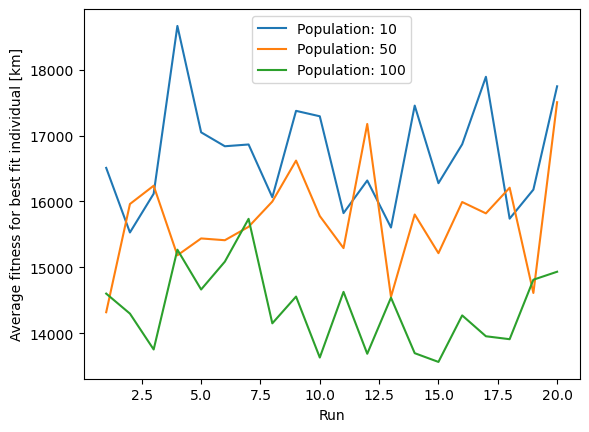

In [952]:
#plotting average fitness across runs

runs = np.linspace(1, 20, 20)
plt.plot(runs, avg_fitness_10, label = "Population: 10")
plt.plot(runs, avg_fitness_50, label = "Population: 50")
plt.plot(runs, avg_fitness_100, label = "Population: 100")
plt.xlabel("Run")
plt.ylabel("Average fitness for best fit individual [km]")
plt.legend()
plt.show()

The population of 100 seems to have the best results when it comes to tour length, however the population of 50 seems to have a higher level of exploration in comparison.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

Length of best tour found over 20 runs using a population of 10: 13128.07 km


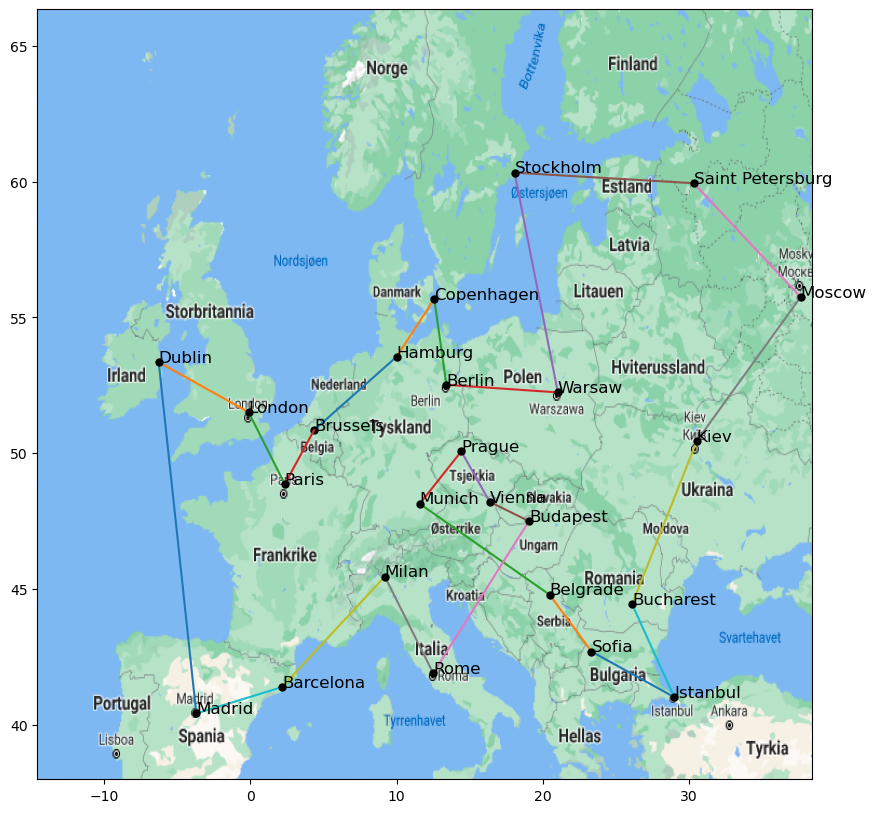

In [953]:
# plotting the optimized tours using a population of 10
print(f"Length of best tour found over 20 runs using a population of 10: {b_length_GA_10:.2f} km")
plot_plan(b_tour_GA_10)

Length of best tour found over 20 runs using a population of 50: 12884.97 km


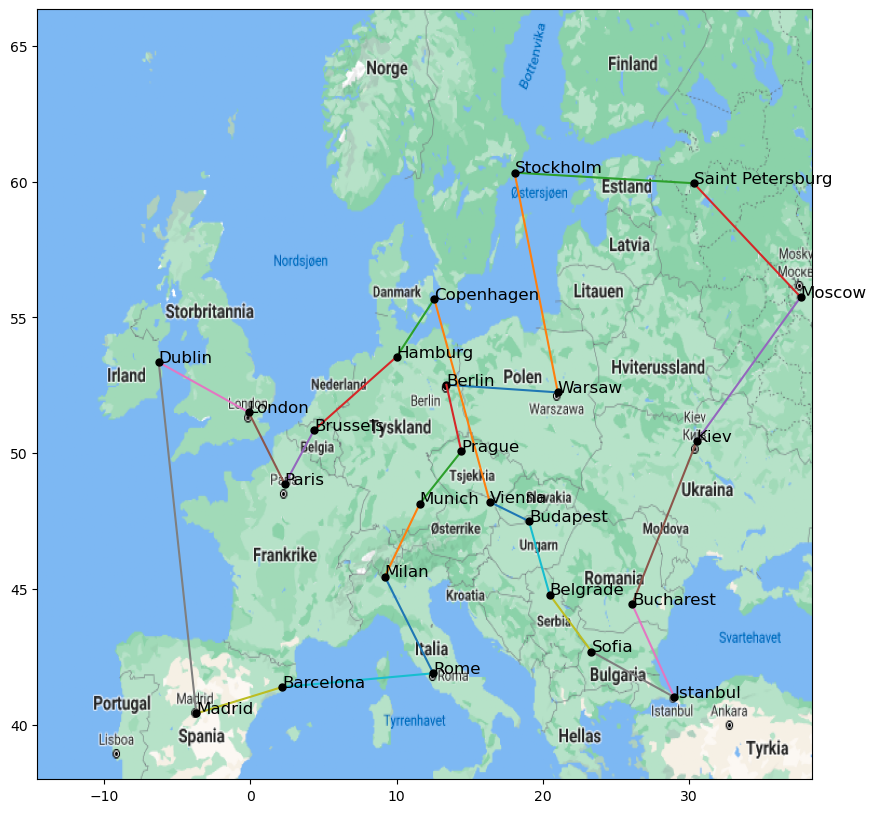

In [954]:
# plotting the optimized tours using a population of 50
print(f"Length of best tour found over 20 runs using a population of 50: {b_length_GA_50:.2f} km")
plot_plan(b_tour_GA_50)

Length of best tour found over 20 runs using a population of 100: 12287.07 km


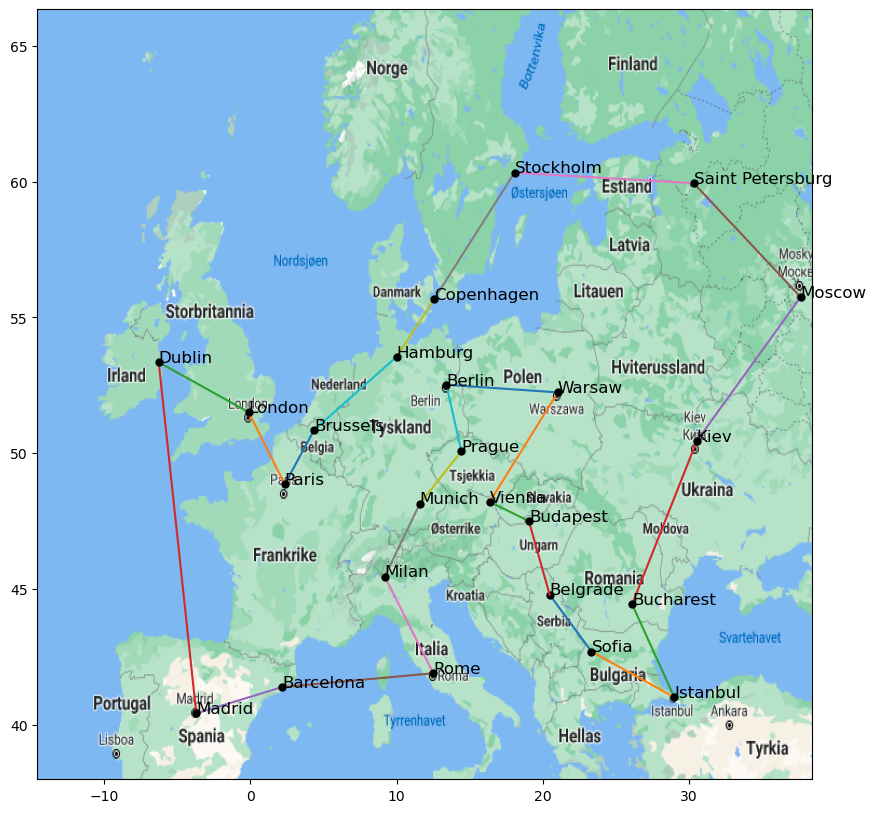

In [955]:
# plotting the optimized tours using a population of 100
print(f"Length of best tour found over 20 runs using a population of 100: {b_length_GA_100:.2f} km")
plot_plan(b_tour_GA_100)

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

Answer: The GA seems to find the shortest tour every run. See plot below and comparison in code comments

Total lenght: 7486.31 km ['Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest']


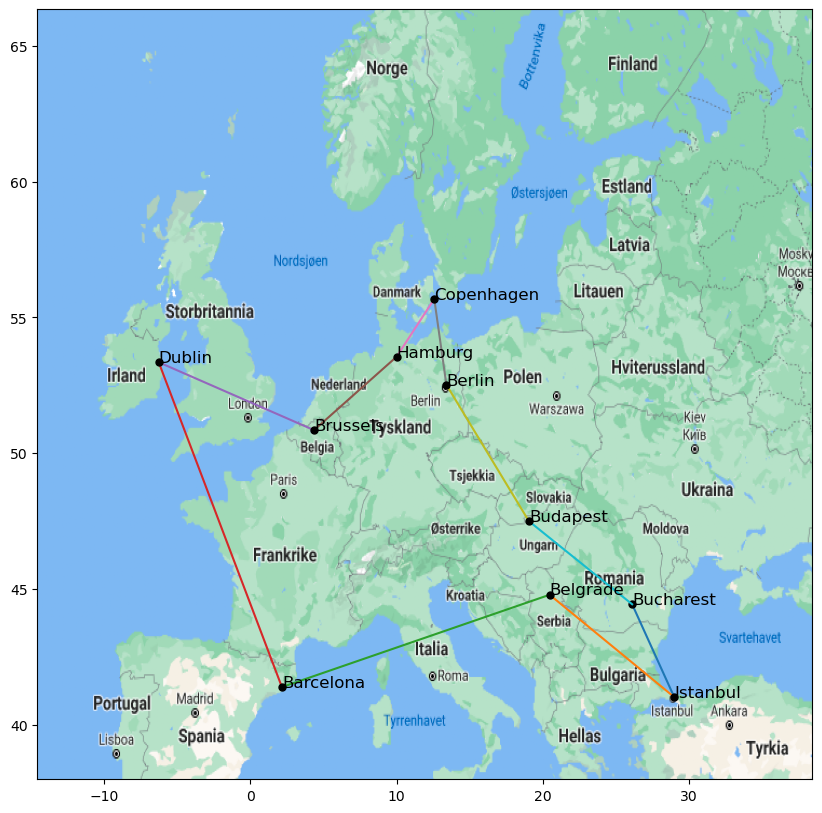

In [933]:
# Answer
fitness, best_length, best_path = genetic_algorithm(first_10, 10)
print(f"Total lenght: {best_length:.2f} km {best_path}")
plot_plan(best_path)

# Shortest tour from exhaustive search
# ('Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen')
# The tour has a total length of 7486.31 km

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

In [938]:
# Testing runningtime of GA vs ES for 10 cities, population size = 10

def runtime_test_GA_es(tour):
    best_lengths_GA = []
    best_tours_GA = []
    times_GA = []

    # finding an average of performance
    for _ in range(20):
        st = time.time()
        fitness, best_l_GA, best_t_GA = genetic_algorithm(tour, 10)
        et = time.time()
        times_GA.append(et - st)
        best_lengths_GA.append(best_l_GA)
        best_tours_GA.append(best_t_GA)

    ind_tour_GA = best_lengths_GA.index(np.min(best_lengths_GA))

    best_tour_GA = best_tours_GA[ind_tour_GA]
    best_length_GA = np.mean(best_lengths_GA)

    if tour == first_10:
        start = time.time()
        best_tour_es = exhaustive_search(first_10)
        best_length_es = length(best_tour_es)
        end = time.time()
        print(f"The best tour of {len(tour)} cities using the exhaustive search algorithm is: {best_tour_es}, with a length of {best_length_es:.2f} km. The program's runtime was {end - start:.2f} s.\n")

    print(f"The best tour of {len(tour)} cities found among 20 runs of the genetic algorithm is: {best_tour_GA}, with a mean lenght between all 20 runs of {best_length_GA:.2f} km. The program had an approximate runtime of {np.mean(times_GA):.2f} s.\n")

# testing for bort the first 10 and all 24 cities.
runtime_test_GA_es(first_10)
runtime_test_GA_es(all_cities)

The best tour of 10 cities using the exhaustive search algorithm is: ('Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen'), with a length of 7486.31 km. The program's runtime was 17.30 s.

The best tour of 10 cities found among 20 runs of the genetic algorithm is: ['Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen'], with a mean lenght between all 20 runs of 7487.15 km. The program had an approximate runtime of 0.67 s.

The best tour of 24 cities found among 20 runs of the genetic algorithm is: ['Barcelona', 'Rome', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul', 'Sofia', 'Warsaw', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen', 'Hamburg', 'Berlin', 'Prague', 'Vienna', 'Munich', 'Milan', 'Paris', 'Brussels', 'Dublin', 'London', 'Madrid'], with a mean lenght between all 20 runs of 14931.92 km. The program had an approximate runtime of 0.9

How many tours were inspected by your GA as compared to by the exhaustive search?

Answer: The GA will inspect from 500 to 2000 (250 to 1000 x 2) tours for each run depending on the results (achieved fitness), wheras the exhaustive search will inspect all possible tours. All possible tours for the first 10 cities is equal to 10! = 3 628 800 different tours.